# Affine Color Correction 

Made by: Haley Schuhl

Adapted from a tutorial by: Katie Murphy

Updated: December 1, 2023

First, import the necessary packages. 

In [1]:
%matplotlib widget

# Imports 
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
#pcv.__version__ 

'4.0.1+294.g1caf3811'

Next, import a sample image. Your images need to be on the server. Remember, always keep your raw images separate from your newly processed images! You will need to change the path to your image, and also if you want specific output folders and directories. 

In [2]:
# Input/output options
args = WorkflowInputs(
    images=["./img/1_B73_sand_C_2023-04-14_10_19_07.jpg"],
    names="image",
    result="results.txt",
    outdir=".",
    writeimg=False,
    debug="plot",
    sample_label="B73"
    )

In [8]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
pcv.params.sample_label = args.sample_label
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 2
pcv.params.text_thickness = 2

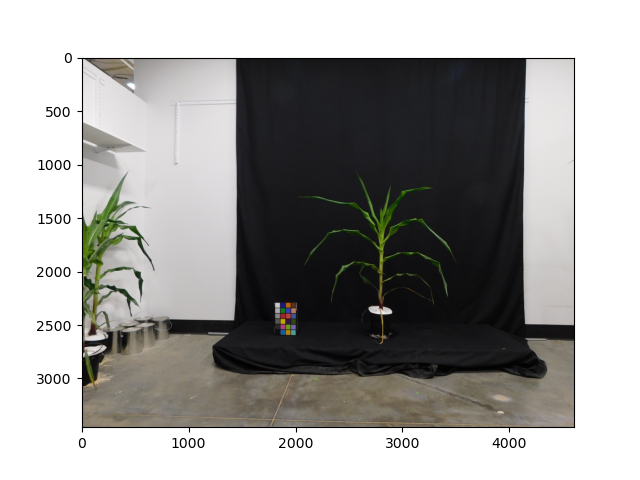

In [4]:
# Read in your image, which is based on the path you put above
img, path, filename = pcv.readimage(filename=args.image)


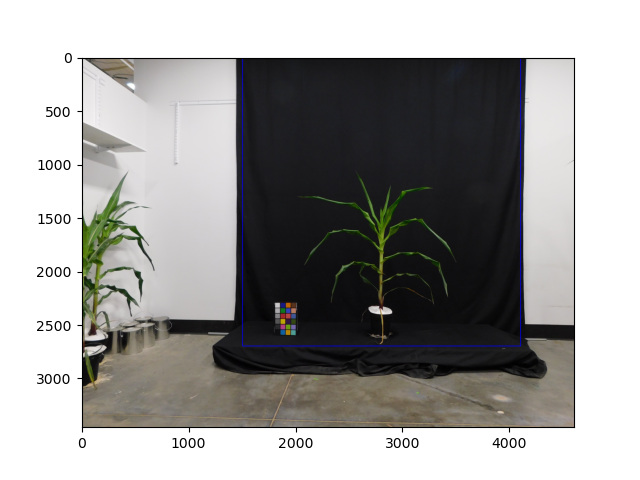

In [11]:
crop_img = pcv.crop(img=img, x=1500, y=0, w=2600, h=2700)

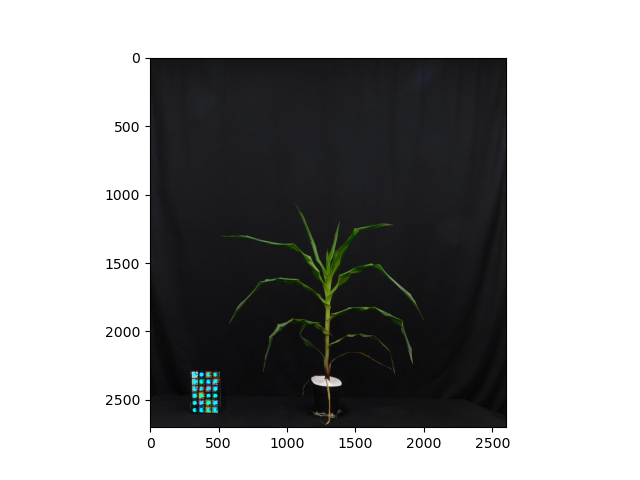

1971.0


In [ ]:
# First, detect the color card.
card_mask = pcv.transform.detect_color_card(rgb_img=crop_img, radius=15)

# Print average chip size, value is stored in outputs.observations 
print(pcv.outputs.metadata['median_color_chip_size']['value'])

In [21]:
# Make a color card matrix 

headers, card_matrix = pcv.transform.get_color_matrix(rgb_img=crop_img, mask=card_mask)

In [22]:
# Define the standard color card matrix, we know what the colors of those chips should be in a "perfect" 
# image, so we will correct to those known values

# When using detect_color_card, you will always set pos=3

std_color_matrix = pcv.transform.std_color_matrix(pos=3)

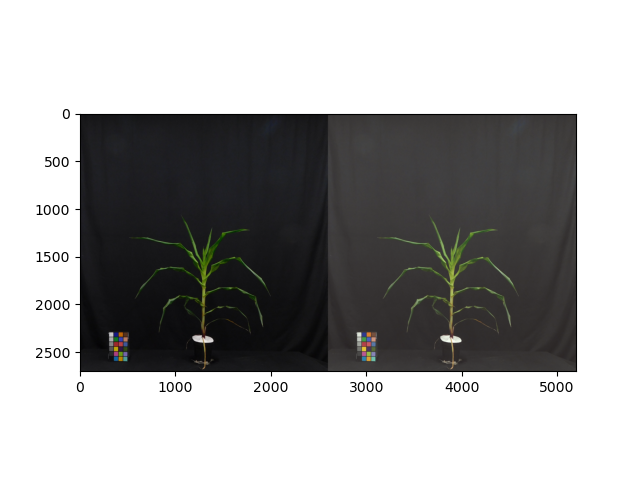

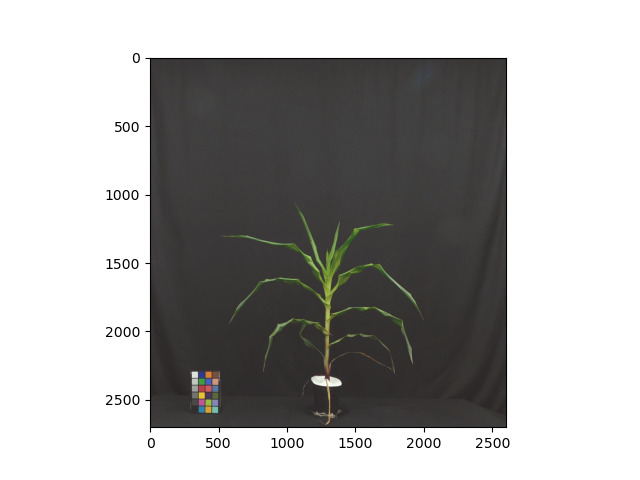

In [23]:
# Color correct your image to the standard values

img_cc = pcv.transform.affine_color_correction(rgb_img=crop_img, source_matrix=card_matrix, 
                                               target_matrix=std_color_matrix)
pcv.plot_image(img_cc)

In [10]:
# If you want to save your color corrected image, do so here. Do NOT save over your raw image. 
# We are saving as a temporary image here becasue we want to use it for thresholding. 

pcv.print_image(img=img_cc, filename="./img/color_corrected_img_temp.png")